In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
set(cls_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Displaying first 64 images for inspection

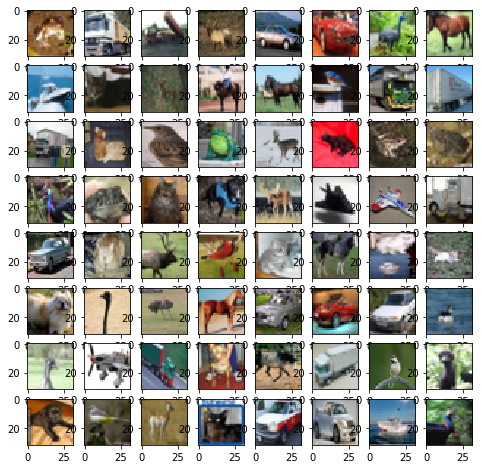

In [7]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
plt.show()    

# Here we flatten the train and test images into 2d numpy arrays

In [6]:
import numpy as np

x_train = images_train

y_train= cls_train

x_train_flat = x_train.reshape(50000, 3072)

x_train_flat.shape

(50000, 3072)

In [7]:
x_test = images_test

y_test= cls_test

x_test_flat = x_test.reshape(10000, 3072)

x_test_flat.shape

(10000, 3072)

# Using PCA to reduce the features

In [8]:
from sklearn.decomposition import PCA

pca= PCA()
pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
k=0
total= sum(pca.explained_variance_)
current_sum=0
while current_sum/total < 0.98:
    current_sum += pca.explained_variance_[k]
    k+=1
k    

156

In [10]:
pca=PCA(n_components=k,whiten=True)
train_transform_data= pca.fit_transform(x_train_flat)
train_transform_data.shape

(50000, 217)

In [11]:
test_transform_data=pca.transform(x_test_flat)
test_transform_data.shape

(10000, 217)

# Splitting the training data in sample train-test data

In [12]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1= train_test_split(train_transform_data,y_train)
x_train1.shape

(37500, 217)

# Checking the performance of various classification algorithms on sample train-test data for comparison

In [13]:
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf_LR = LogisticRegression(C=1)
#grid_LR = {"C" : [10**-i for i in range(-2, 2)]}
#grid_search_LR = GridSearchCV(clf_LR, grid_LR,cv=model_selection.KFold(n_splits=10,shuffle=True,random_state=1))
clf_LR.fit(x_train1, y_train1)

clf_LR.score(x_test1,y_test1)
#grid_search_LR.best_score_

0.40448000000000001

In [29]:
#grid_search_LR.best_estimator_

In [17]:
clf_KN = KNeighborsClassifier()
clf_KN.fit(x_train1,y_train1)
clf_KN.score(x_test1,y_test1)

0.19864000000000001

In [21]:
clf_SVC = svm.SVC()
clf_SVC.fit(x_train1,y_train1)
clf_SVC.score(x_test1,y_test1)

0.53271999999999997

In [20]:
clf_DT = DecisionTreeClassifier(criterion="gini",splitter="best")
clf_DT.fit(x_train1,y_train1)
clf_DT.score(x_test1,y_test1)

0.254

In [19]:
clf_RF = RandomForestClassifier(criterion='gini')
clf_RF.fit(x_train1,y_train1)
clf_RF.score(x_test1,y_test1)

0.27151999999999998

# Selecting the best classifier and storing the predictions in y_pred 

In [22]:
clf_svm=  svm.SVC()
clf_svm.fit(train_transform_data,y_train)
y_pred= clf_svm.predict(test_transform_data)
y_pred

array([3, 8, 8, ..., 5, 5, 7])

# Saving the predictions in a dataframe and converting them to class names from numbers

In [23]:
# ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
import numpy as np
import pandas as pd

# example : y_pred= np.array([0,1,2,1])
df= pd.DataFrame(y_pred)

def getString(inte):
    if inte ==0:
        return 'airplane'
    elif inte==1:
        return 'automobile'
    elif inte==2:
        return 'bird'
    elif inte==3:
        return 'cat'
    elif inte==4:
        return 'deer'
    elif inte==5:
        return 'dog'
    elif inte==6:
        return 'frog'
    elif inte==7:
        return 'horse'
    elif inte==8:
        return 'ship'
    else:
        return 'truck'
    
for i in range(len(y_pred)):
    df[0][i]= getString(df[0][i])

#df

# Saving the predictions in a csv

In [24]:
df.to_csv("cifar10predictions_SVM.csv",header=False,index=False)

# End